In [1]:
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rate, data = wav.read("data/songs/elise2.wav")
rate2, data2 = wav.read("data/songs/elise2.wav")

In [3]:
left_data = data[:, 0]
right_data = data[:, 1]

In [4]:
left_data2 = data2[:, 0]
right_data2 = data2[:, 1]

In [5]:
length = min(len(left_data), len(left_data2))
t = np.linspace(0, length / rate, num=length)

left_data = left_data[:length]
left_data2 = left_data2[:length]

right_data = right_data[:length]
right_data2 = right_data2[:length]

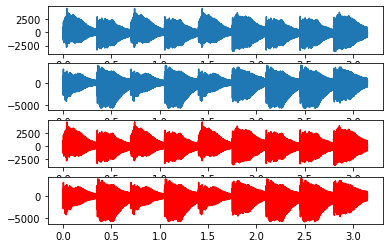

In [6]:
plt.subplot(4, 1, 1)
plt.plot(t, left_data)
plt.subplot(4, 1, 2)
plt.plot(t, right_data)
plt.subplot(4, 1, 3)
plt.plot(t, left_data2, color="r")
plt.subplot(4, 1, 4)
plt.plot(t, right_data2, color="r")
plt.show()

In [24]:
np.corrcoef(left_data, left_data2)

array([[1., 1.],
       [1., 1.]])

In [7]:
print("Average cross correlation between audio samples is",
      (np.corrcoef(left_data, left_data2)[0, 1] + np.corrcoef(right_data, right_data2)[0, 1]) / 2)

Average cross correlation between audio samples is 1.0


In [8]:
freqs = (np.fft.fftfreq(length) * length)[:length//2]

left_data_fft = (2.0 * np.abs(np.fft.fftn(left_data).real/length))[:length//2]
left_data2_fft = (2.0 * np.abs(np.fft.fftn(left_data2).real/length))[:length//2]
right_data_fft = (2.0 * np.abs(np.fft.fftn(right_data).real/length))[:length//2]
right_data2_fft = (2.0 * np.abs(np.fft.fftn(right_data2).real/length))[:length//2]

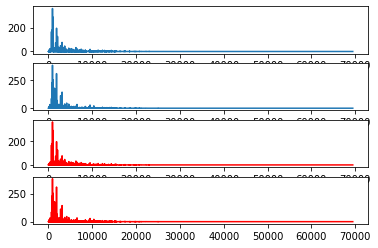

In [9]:
plt.subplot(4, 1, 1)
plt.plot(freqs, left_data_fft)
plt.subplot(4, 1, 2)
plt.plot(freqs, right_data_fft)
plt.subplot(4, 1, 3)
plt.plot(freqs, left_data2_fft, color="r")
plt.subplot(4, 1, 4)
plt.plot(freqs, right_data2_fft, color="r")
plt.show()

In [23]:
print(left_data_fft.shape)
print(left_data2_fft.shape)

(69453,)
(69453,)


In [22]:
mean_squared_error(left_data_fft, left_data2_fft)

0.0

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
print("Average MSE of between audio signals is",
     (mean_squared_error(left_data, left_data2) + mean_squared_error(right_data, right_data2))/2)

Average MSE of between audio signals is 0.0


In [13]:
print("Average MSE of between audio FFTs is",
     (mean_squared_error(left_data_fft, left_data2_fft) + mean_squared_error(right_data_fft, right_data2_fft))/2)

Average MSE of between audio FFTs is 0.0
